In [26]:
library(tidyverse)
england = read_csv('./data/england.csv')
england_2020 = read_csv('./data/england_2020.csv')

pl = england %>% 
  left_join(england_2020)  %>% 
  filter(tier==1 & Season >= 1992)

teams = pl %>% select(home) %>% unique()
pl = pl %>% mutate(home_points = ifelse(hgoal > vgoal, 3, 
                                    ifelse(hgoal == vgoal, 1, 
                                          0)),
              away_points = ifelse(home_points == 3, 0,
                                   ifelse(home_points == 1, 1, 3))) %>%
  distinct()

home_points = pl %>% 
  group_by(home) %>%
  summarise(home_points=sum(home_points),
            home_games=n()) %>%
  rename(team=home)

away_points = pl %>%
  group_by(visitor) %>%
  summarise(away_points = sum(away_points),
            away_games=n()) %>%
  rename(team=visitor)

total_points = home_points %>%
  left_join(away_points, by='team') %>%
  mutate(total_points = home_points + away_points,
         total_games = home_games + away_games,
         ppg = total_points / total_games) %>%
  select(team, total_points, total_games, ppg)


# shortened names mapping
team_names = c(
  'Arsenal' = 'Arsenal',
  'Aston Villa' = 'Villa',
  'Chelsea' = 'Chelsea',
  'Liverpool' = 'Liverpool',
  'Manchester City' = 'Man City',
  'Newcastle United' = 'Newcastle',
  'Oldham Athletic' = 'Oldham',
  'Sheffield United' = 'Shef Utd',
  'Southampton' = 'Southampton',
  'West Ham United' = 'West Ham',
  'Norwich City' = 'Norwich',
  'Tottenham Hotspur' = 'Tottenham',
  'Everton' = 'Everton',
  'Ipswich Town' = 'Ipswich',
  'Leeds United' = 'Leeds',
  'Wimbledon' = 'Wimbledon',
  'Blackburn Rovers' = 'Blackburn',
  'Coventry City' = 'Coventry',
  'Manchester United' = 'Man Utd',
  'Queens Park Rangers' = 'QPR',
  'Sheffield Wednesday' = 'Shef Wed',
  'Swindon Town' = 'Swindon',
  'Crystal Palace' = 'Palace',
  'Leicester City' = 'Leicester',
  'Nottingham Forest' = 'Nott Forest',
  'Bolton Wanderers' = 'Bolton',
  'Middlesbrough' = 'Middlesbrough',
  'Derby County' = 'Derby',
  'Sunderland' = 'Sunderland',
  'Barnsley' = 'Barnsley',
  'Charlton Athletic' = 'Charlton',
  'Watford' = 'Watford',
  'Bradford City' = 'Bradford',
  'Fulham' = 'Fulham',
  'Birmingham City' = 'Birmingham',
  'West Bromwich Albion' = 'West Brom',
  'Portsmouth' = 'Portsmouth',
  'Wolverhampton Wanderers' = 'Wolves',
  'Wigan Athletic' = 'Wigan',
  'Reading' = 'Reading',
  'Hull City' = 'Hull',
  'Stoke City' = 'Stoke',
  'Burnley' = 'Burnley',
  'Blackpool' = 'Blackpool',
  'Swansea City' = 'Swansea',
  'Cardiff City' = 'Cardiff',
  'AFC Bournemouth' = 'Bournemouth',
  'Brighton & Hove Albion' = 'Brighton',
  'Huddersfield Town' = 'Huddersf'
)


team_names = data.frame(team_names) %>% mutate(team_names_long = rownames(.))


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_date(format = ""),
  Season = col_double(),
  home = col_character(),
  visitor = col_character(),
  FT = col_character(),
  hgoal = col_double(),
  vgoal = col_double(),
  division = col_double(),
  tier = col_double(),
  totgoal = col_double(),
  goaldif = col_double(),
  result = col_character()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_date(format = ""),
  Season = col_double(),
  home = col_character(),
  visitor = col_character(),
  FT = col_character(),
  hgoal = col_double(),
  vgoal = col_double(),
  result = col_character(),
  goaldif = col_double()
)

Joining, by = c("Date", "Season", "home", "visitor", "FT", "hgoal", "vgoal", "goaldif", "result")
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


In [51]:
head(total_points)

team,total_points,total_games,ppg
<chr>,<dbl>,<int>,<dbl>
AFC Bournemouth,211,190,1.1105263
Arsenal,2011,1076,1.8689591
Aston Villa,1258,962,1.3076923
Barnsley,35,38,0.9210526
Birmingham City,301,266,1.1315789
Blackburn Rovers,970,696,1.3936782


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”Saving 7 x 7 in image
Warning message in if (0 <= angle & angle < 90) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (90 <= angle & angle < 180) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (180 <= angle & angle < 270) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (0 <= angle & angle < 90) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (90 <= angle & angle < 180) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (180 <= angle & angle < 270) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (0 <= angle & angle < 90) {:
“the condition has length > 1 and on

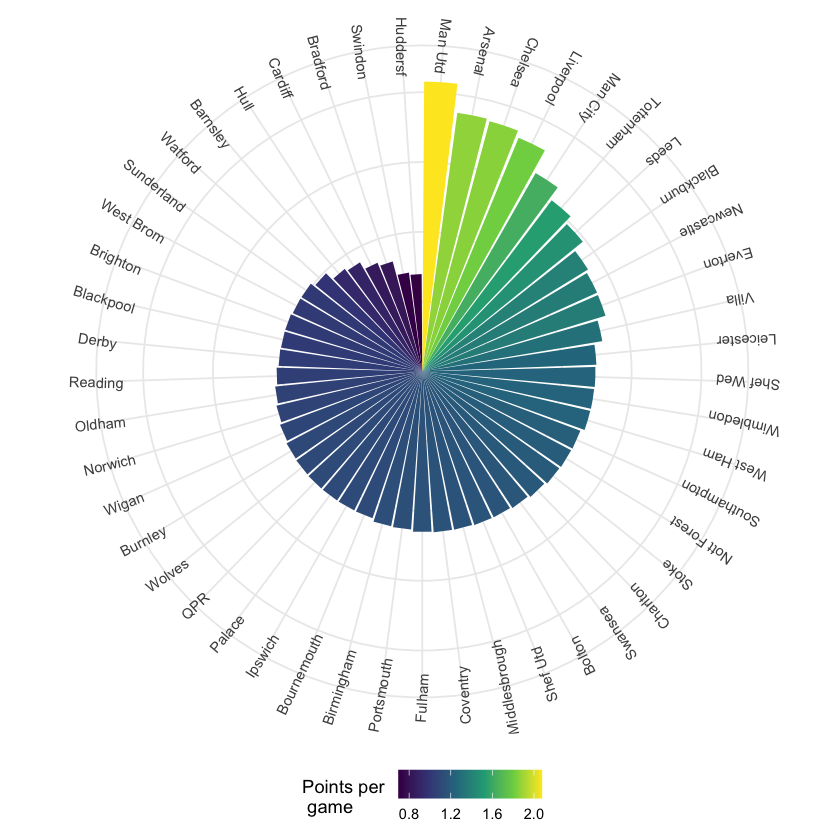

In [58]:
plot_data = total_points %>%
  left_join(team_names, by=c('team' = 'team_names_long'))

teams_to_label = plot_data %>%
  filter(team_names %in% c('Man Utd', 'Huddersf', 'Palace', 'West Brom', 'Shef Utd'))

plot_data %>%
  ggplot(aes(x=forcats::fct_reorder(team_names, -ppg), y=ppg, fill=ppg)) + 
  geom_bar(stat='identity') + 
  coord_polar(theta='x') +
  scale_fill_viridis_c(name='Points per \n game') +
  theme_minimal() + 
  theme(axis.title = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(
          angle= -90 - 360 / length(unique(total_points$team)) * seq_along(total_points$team)
        ),
        legend.position = 'bottom') + 
  ggsave('./figures/pl_ppg.jpg')

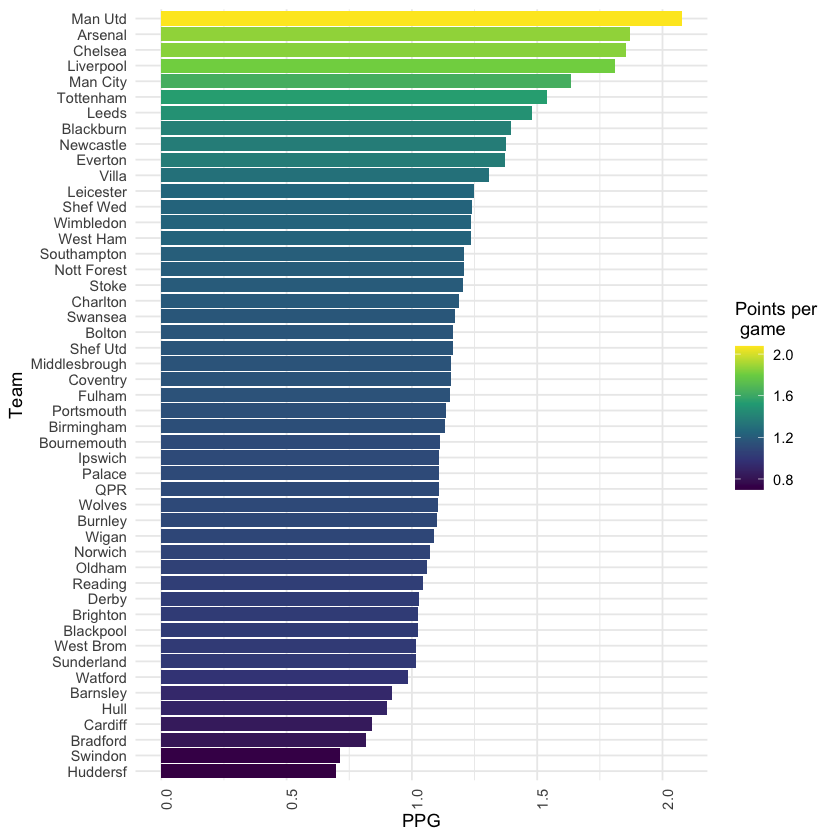

In [65]:
plot_data %>%
  ggplot(aes(x=forcats::fct_reorder(team_names, ppg), y=ppg, fill=ppg)) + 
  geom_bar(stat='identity') + 
  scale_fill_viridis_c(name='Points per \n game') +
  labs(y='PPG', x='Team') +
  coord_flip() +
  theme_minimal() + 
  theme(axis.text.x=element_text(angle=90))

# Best and worst

In [67]:
plot_data %>%
  filter(ppg == max(plot_data$ppg) | ppg == min(plot_data$ppg))

team,total_points,total_games,ppg,team_names
<chr>,<dbl>,<int>,<dbl>,<fct>
Huddersfield Town,53,76,0.6973684,Huddersf
Manchester United,2234,1076,2.0762082,Man Utd
